In [1]:
# import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
# read the csv file
df = pd.read_csv('resources/survey.csv')

In [3]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [4]:
# looking at the data we can see that we have to do some cleaning
# we can also drop some of the columns as they're irrelevant to our analysis
# as a group we decided to drop the timestamp column as it only indicates the date and time of the entry into the dataset
# same as the comment column, most of the rows are empty and we're not going to use it for any visualisations

df = df.drop(['Timestamp', 'comments'], axis=1)

In [5]:
# displaying the gender column as we've noticed that there's some different spellings that we have to replace
# also decided to combine some of them because let's say cis-male means born as male and decide to be male
# same for cis-female, so we decided to combine them into 3 categories: Male, Female and Other
df['Gender'].value_counts()

Male                                              615
male                                              206
Female                                            121
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Male                                                3
Woman                                               3
Cis Male                                            2
Man                                                 2
Female (trans)                                      2
Female                                              2
Trans woman                                         1
msle                                                1
male leaning androgynous                            1
Neuter                      

In [6]:
#data cleaning in the gender column, replacing miss spellings and combining in three categories

df['Gender'].replace(['Male ', 'male', 'M', 'm', 'Male', 'Cis Male',
                     'Man', 'cis male', 'Mail', 'Male-ish', 'Male (CIS)',
                      'Cis Man', 'msle', 'Malr', 'Mal', 'maile', 'Make',], 'Male', inplace = True)

df['Gender'].replace(['Female ', 'female', 'F', 'f', 'Woman', 'Female',
                     'femail', 'Cis Female', 'cis-female/femme', 'Femake', 'Female (cis)',
                     'woman',], 'Female', inplace = True)

df['Gender'].replace(['Female (trans)', 'queer/she/they', 'non-binary',
                     'fluid', 'queer', 'Androgyne', 'Trans-female', 'male leaning androgynous',
                      'Agender', 'A little about you', 'Nah', 'All',
                      'ostensibly male, unsure what that really means',
                      'Genderqueer', 'Enby', 'p', 'Neuter', 'something kinda male?',
                      'Guy (-ish) ^_^', 'Trans woman',], 'Other', inplace = True)

In [7]:
#display the cleaned data
df['Gender'].value_counts()

Male      991
Female    247
Other      21
Name: Gender, dtype: int64

In [8]:
# we've seen some errors in the Age column too, there was a person that was over 99 billion years old
# you never know but we can only guess that is wrong so we need to do some cleaning here too
df['Age'].value_counts()

 29             85
 32             82
 26             75
 27             71
 33             70
 28             68
 31             67
 34             65
 30             63
 25             61
 35             55
 23             51
 24             46
 37             43
 38             39
 36             37
 40             33
 39             33
 43             28
 22             21
 41             21
 42             20
 21             16
 45             12
 46             12
 44             11
 19              9
 18              7
 48              6
 50              6
 20              6
 51              5
 49              4
 56              4
 57              3
 54              3
 55              3
 47              2
 60              2
 99999999999     1
 5               1
-1               1
 11              1
 8               1
 61              1
 53              1
-29              1
-1726            1
 65              1
 62              1
 58              1
 329             1
 72         

In [9]:
# data cleaning the age column using the loc funcion
df.loc[df.Age<12,'Age']=15
df.loc[df.Age>75,'Age']=75

#printing the cleaned column
df['Age'].value_counts()

29    85
32    82
26    75
27    71
33    70
28    68
31    67
34    65
30    63
25    61
35    55
23    51
24    46
37    43
38    39
36    37
39    33
40    33
43    28
22    21
41    21
42    20
21    16
46    12
45    12
44    11
19     9
18     7
15     6
50     6
48     6
20     6
51     5
56     4
49     4
54     3
55     3
57     3
47     2
75     2
60     2
62     1
58     1
65     1
53     1
61     1
72     1
Name: Age, dtype: int64

In [10]:
# at this point we were satisfied with the data cleaning and proceeded to do some visualisations and analysis

#print the data frame's columns to decide which ones we want to compare
df.columns

Index(['Age', 'Gender', 'Country', 'state', 'self_employed', 'family_history',
       'treatment', 'work_interfere', 'no_employees', 'remote_work',
       'tech_company', 'benefits', 'care_options', 'wellness_program',
       'seek_help', 'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

In [70]:
# for the first visualisation we decided to see if any treatment is beeing used
# we are going to use plotly for the first bar chart
fig1 = px.histogram(df, x = 'treatment',color='treatment', title="Have you sought treatment for a mental health condition?")
fig1

In [71]:
# we ran into a bit of a challange here because we didn't know how to save a plotly live image into the output
# but after a bit of research we've seen that we need to install the "kaleido" package to do so.
# we knew we can save it just by clicking the top right corner of the chart and then download as PNG
# but we wanted the code to do it, so there is the solution
fig1.write_image('output/treatment.png')

In [ ]:
# the insight from this bar chart shows that 50% of people are seeking help. Something needs to be done
# so everyone knows that help is available to them and a lot more than half of the people should be looking for a treatment

In [36]:
# for the next visualisation we decided to do a pie chart based on the question:
# If you have a mental health condition, do you feel that it interferes with your work?

#look up and do value counts on that column
df["work_interfere"].value_counts()


Sometimes    465
Never        213
Rarely       173
Often        144
Name: work_interfere, dtype: int64

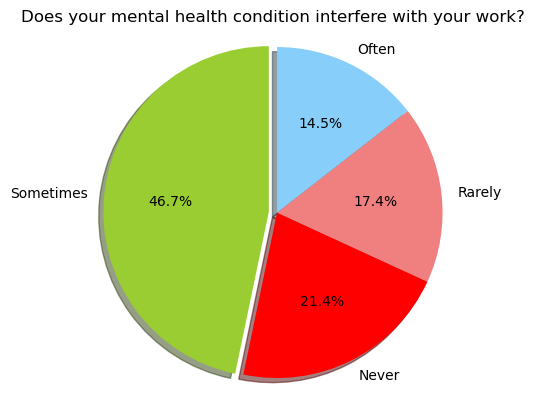

In [69]:
#create the pie chart
labels = ["Sometimes", "Never", "Rarely", "Often"]
colors = ["yellowgreen", "red", "lightcoral", "lightskyblue"]
explode = (0.05, 0, 0, 0)
plt.title("Does your mental health condition interfere with your work?")
plt.pie(df["work_interfere"].value_counts(), labels=labels, colors=colors, 
        explode=explode, autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
#save it in the output and display
plt.savefig('output/work_interfere.png')
plt.show()
